In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
all_beauty = pd.read_csv('all_beauty.csv')
all_beauty.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [64]:
all_beauty.isna().sum()

rating                 0
title                160
text                 212
images                 0
asin                   0
parent_asin            0
user_id                0
timestamp              0
helpful_vote           0
verified_purchase      0
dtype: int64

In [65]:
all_beauty.rename(columns={'parent_asin': 'product_id'}, inplace=True)
all_beauty.head()

,rating,title,text,images,asin,product_id,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [66]:
data = all_beauty.drop(columns=['title', 'text', 'images', 'asin', 'timestamp', 'helpful_vote'])
data.head()

,rating,product_id,user_id,verified_purchase
0,5.0,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,True
1,4.0,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,True
2,5.0,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,True
3,1.0,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,True
4,5.0,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,True


In [67]:
data[data['verified_purchase'] == False].shape[0]
data = data[data['verified_purchase'] == True]

In [68]:
data = data.drop(columns=['verified_purchase'])
data.head()

,rating,product_id,user_id
0,5.0,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ
1,4.0,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ
2,5.0,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ
3,1.0,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ
4,5.0,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634969 entries, 0 to 701527
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   rating      634969 non-null  float64
 1   product_id  634969 non-null  object 
 2   user_id     634969 non-null  object 
dtypes: float64(1), object(2)
memory usage: 19.4+ MB


In [70]:
data.describe()['rating'].T

count    634969.000000
mean          3.948166
std           1.505427
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [71]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(data.rating.min()))
print('Maximum rating is: %d' %(data.rating.max()))

Minimum rating is: 1
Maximum rating is: 5


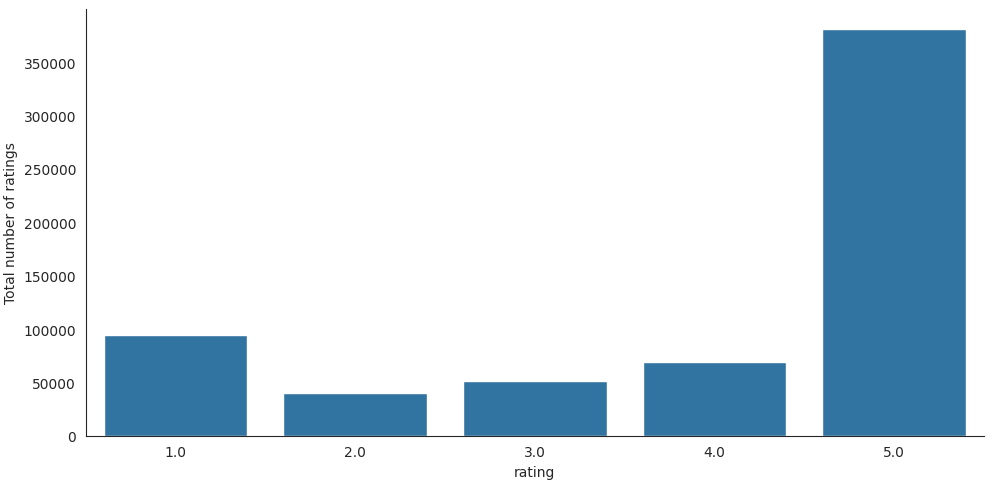

In [72]:
with sns.axes_style('white'):
    g = sns.catplot(x="rating", data=data, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")

In [73]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",data.shape[0])
print("Total No of Users   :", len(np.unique(data.user_id)))
print("Total No of products  :", len(np.unique(data.product_id)))

Total data 
--------------------------------------------------

Total no of ratings : 634969
Total No of Users   : 584592
Total No of products  : 106811


## Popularity Based Recommendation 
This is nothing but giving the top n recommnedations based on popularity of the product.

In [74]:
grouped_data = data.groupby('product_id').filter(lambda x:x['rating'].count() >= 50)
grouped_data.head()

,rating,product_id,user_id
0,5.0,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ
7,3.0,B08BBQ29N5,AEYORY2AVPMCPDV57CE337YU5LXA
24,5.0,B07ZJKVVLW,AHPUT3ITXCHQJO7OMF74LEMYHIVA
30,2.0,B083BDVS36,AHZ6XMOLEWA67S3TX7IWEXXGWSOA
31,5.0,B09FP8PP2K,AH6ZNRRCEEWR6P34CNLQ2LRLUU3Q


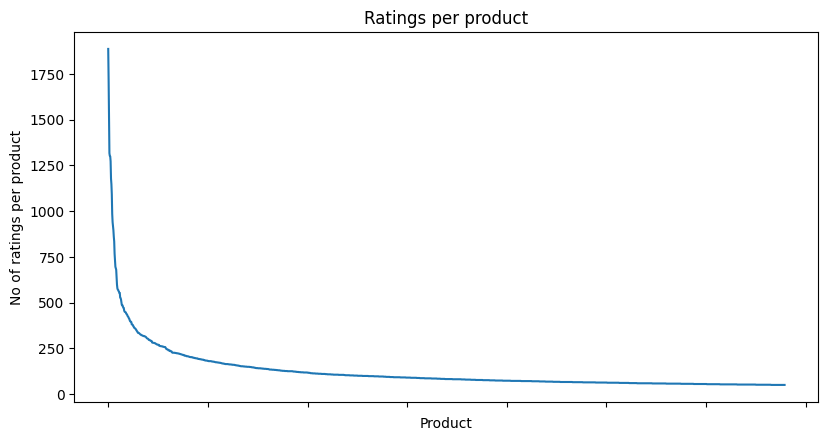

In [75]:
no_of_ratings_per_product = grouped_data.groupby(by='product_id')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('Ratings per product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [76]:
grouped_data.groupby('product_id')['rating'].mean().head()  

product_id
B000050FDE    4.551948
B00009RB0X    4.074468
B0000ZLF18    3.494505
B00011JN5G    2.775000
B0001HYLR0    4.355932
Name: rating, dtype: float64

In [77]:
grouped_data.groupby('product_id')['rating'].mean().sort_values(ascending=False).head()

product_id
B00H3WGN9K    4.959459
B093GRLKB9    4.950820
B07DT5FHY4    4.926829
B07M6MXTH2    4.926316
B07C97XHJH    4.923810
Name: rating, dtype: float64

In [78]:
grouped_data.groupby('product_id')['rating'].count().sort_values(ascending=False).head()

product_id
B085BB7B1M    1887
B0BM4GX6TT    1719
B07C533XCW    1495
B09X9BG4FC    1317
B019GBG0IE    1302
Name: rating, dtype: int64

In [79]:
ratings_mean_count = pd.DataFrame(grouped_data.groupby('product_id')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(grouped_data.groupby('product_id')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
product_id,,
B000050FDE,4.551948,154
B00009RB0X,4.074468,94
B0000ZLF18,3.494505,91
B00011JN5G,2.775000,200
B0001HYLR0,4.355932,59


In [80]:
ratings_mean_count['rating_counts'].max()

1887

<Axes: >

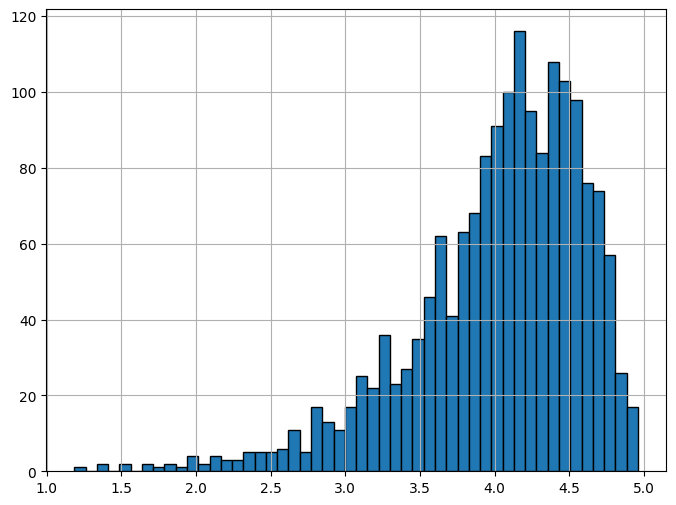

In [82]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 800x600 with 0 Axes>

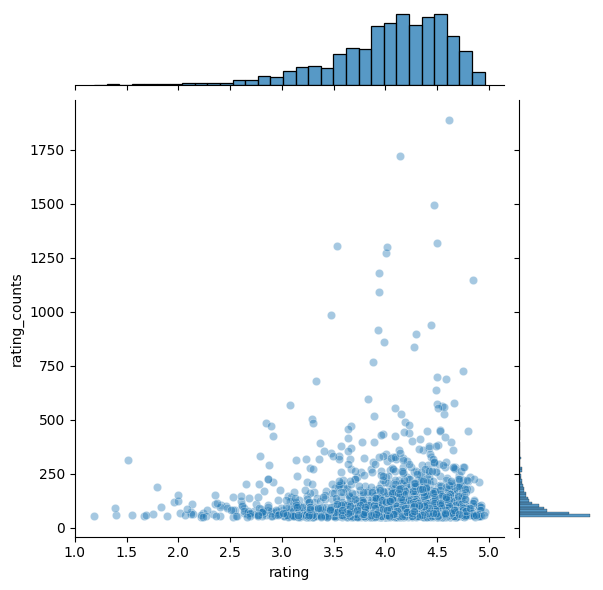

In [83]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [ ]:
popular_products = pd.DataFrame(grouped_data.groupby('product_id')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular

,rating
product_id,
B085BB7B1M,1887
B0BM4GX6TT,1719
B07C533XCW,1495
B09X9BG4FC,1317
B019GBG0IE,1302
...,...
B01GDYH3RE,50
B07NZYRLDS,50
B018AJ02M8,50


In [85]:
meta_data = pd.read_csv('meta_All_Beauty.csv')
meta_data.rename(columns={'parent_asin': 'product_id'}, inplace=True)
product_names = meta_data[['product_id', 'title']]
product_names.head()

,product_id,title
0,B01CUPMQZE,"Howard LC0008 Leather Conditioner, 8-Ounce (4-..."
1,B076WQZGPM,Yes to Tomatoes Detoxifying Charcoal Cleanser ...
2,B000B658RI,Eye Patch Black Adult with Tie Band (6 Per Pack)
3,B088FKY3VD,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4..."
4,B07NGFDN6G,Precision Plunger Bars for Cartridge Grips – 9...


In [86]:
most_popular_products = pd.merge(most_popular, product_names, on='product_id', how='inner')
most_popular_products.head()

,product_id,rating,title
0,B085BB7B1M,1887,Salux Nylon Japanese Beauty Skin Bath Wash Clo...
1,B0BM4GX6TT,1719,"Godefroy Tint Kit for Spot Coloring, Dark Brown"
2,B07C533XCW,1495,Segbeauty empty bottle 160083
3,B09X9BG4FC,1317,Makone Crystal Crowns and Tiaras with Comb Hea...
4,B019GBG0IE,1302,Collapsible Hair Diffuser by The Curly Co. wit...


## Collaberative filtering 

In [87]:
sample = grouped_data.sample(frac=0.4, random_state=69)
ratings_matrix = sample.pivot_table(values='rating', index='user_id', columns='product_id', fill_value=0)
ratings_matrix

product_id,B000050FDE,B00009RB0X,B0000ZLF18,B00011JN5G,B0001HYLR0,B00023J4AW,B0002KHT8Y,B0002M5JNY,B0002SGSNI,B0006B0W42,...,B0C52PWCV2,B0C58XKGCS,B0C5FZDPD3,B0C5KJM4TB,B0C619KBLQ,B0C6R11392,B0C7WQK2QW,B0C9CWKY9G,B0CDH5TH82,B0CDNZ7F2V
user_id,,,,,,,,,,,,,,,,,,,,,
AE222BBOVZIF42YOOPNBXL4UUMYA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE223YNB742YCE2HSRKGR4INFPQQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE2245R4KRWQUF7AFV46ZG4BBQPA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE224QB4K4PDIZ6FVU6MGVFEYSPQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE227W3O3ZQJ33H6OPAIFX6PNZLQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AHZZRPRBETEYOSQGIOO32I6J2ZEQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AHZZTNMAK7FY3T246BZZNOFPEX5A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AHZZUM3YWG57XMZ72JGFJQ2634VQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
ratings_matrix.shape

(83896, 1698)

In [89]:
X = ratings_matrix.T
X

user_id,AE222BBOVZIF42YOOPNBXL4UUMYA,AE223YNB742YCE2HSRKGR4INFPQQ,AE2245R4KRWQUF7AFV46ZG4BBQPA,AE224QB4K4PDIZ6FVU6MGVFEYSPQ,AE227W3O3ZQJ33H6OPAIFX6PNZLQ,AE22BCXGNK7GV24HSZQ2364IRDIQ,AE22CNEQCUSRHXTD5SBMSR3DDEIQ,AE22DJ3KMLPQS5JXQULPZTUDBLWQ,AE22JPQNQI2KOOQPBRTNY5J4T3WA,AE22K6CRUWMLZOWWU77J52GSA3ZQ,...,AHZZOFGGEUQ2222W5TTZKDNTHN6A,AHZZOHEFU5EO466C2BAPPVV7CEJA,AHZZP6CCE56Q5ZCSCDUIQEKQY57Q,AHZZPPV72DKCQ57X7YXCVPM54KSQ,AHZZQUIXUY6ATT2GZ6HZKMK3CEBQ,AHZZRPRBETEYOSQGIOO32I6J2ZEQ,AHZZTNMAK7FY3T246BZZNOFPEX5A,AHZZUM3YWG57XMZ72JGFJQ2634VQ,AHZZVXLX4HTE6FSXPG5RSOH74LJA,AHZZZAK24AJ3JNBDUZJGHHWSRVAA
product_id,,,,,,,,,,,,,,,,,,,,,
B000050FDE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00009RB0X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0000ZLF18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00011JN5G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0001HYLR0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B0C6R11392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0C7WQK2QW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0C9CWKY9G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
X.shape

(1698, 83896)

In [91]:
X1 = X

In [92]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=20)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(1698, 20)

In [93]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(1698, 1698)

In [ ]:
def recommend_products_by_userID(user_id, ratings_matrix, correlation_matrix, product_names, n_top=10):
    # Check if the user exists in the ratings matrix
    if user_id not in ratings_matrix.index:
        print(f"User {user_id} not found in the dataset.")
        return None

    # Get products rated highly by the user (rating > 0)
    liked_products = ratings_matrix.loc[user_id][ratings_matrix.loc[user_id] > 0].index

    if not liked_products.any():
        print(f"User {user_id} has not rated any products.")
        return None
    
    # Precompute similarity scores for all products (once, instead of in each loop)
    similar_products_dict = {}
    for product_id in liked_products:
        product_idx = list(ratings_matrix.columns).index(product_id)
        similarity_scores = correlation_matrix[product_idx]
        similar_products_dict[product_id] = similarity_scores

    # Find top n similar products for each liked product and update recommendations
    recommended_products = []
    for product_id, similarity_scores in similar_products_dict.items():
        similar_products_idx = np.argsort(similarity_scores)[::-1][1:n_top + 1]  # Skip the first (self-similarity)
        
        for idx in similar_products_idx:
            similar_product_id = ratings_matrix.columns[idx]
            similarity_score = similarity_scores[idx]
            recommended_products.append((similar_product_id, similarity_score))

    # Filter out products already rated by the user
    recommended_products = [prod for prod in recommended_products if prod[0] not in liked_products]

    if not recommended_products:
        print(f"No new products to recommend for user {user_id}.")
        return None

    # Sort the recommendations by similarity score in descending order
    recommended_products = sorted(recommended_products, key=lambda x: x[1], reverse=True)

    # Convert to DataFrame for better readability
    recommended_products_df = pd.DataFrame(recommended_products, columns=['product_id', 'similarity_score'])

    # Merge to get product names
    recommended_products_df = pd.merge(recommended_products_df, product_names, on='product_id', how='inner')

    # Print the recommendations
    print(f"Recommended products for user {user_id}:")
    print(recommended_products_df[['product_id', 'title', 'similarity_score']])

    return recommended_products_df

In [95]:
def recommend_products_by_productID(product_id, ratings_matrix, correlation_matrix, product_names, threshold=0.7, n_top=10):
    # Check if the product_id exists in the ratings_matrix
    if product_id not in ratings_matrix.columns:
        print(f"Product ID {product_id} not found in the dataset.")
        return None

    # Find the index of the given product_id in the ratings_matrix columns
    product_idx = list(ratings_matrix.columns).index(product_id)
    
    # Retrieve similarity scores for the given product
    similarity_scores = correlation_matrix[product_idx]
    
    # Get the indices of the products with similarity greater than the threshold (excluding the product itself)
    similar_products_idx = np.argsort(similarity_scores)[::-1]  # Sort by descending order of similarity
    similar_products = []
    for idx in similar_products_idx[1:]:  
        if similarity_scores[idx] > threshold:
            similar_products.append((ratings_matrix.columns[idx], similarity_scores[idx]))
        else:
            break  
    
    # If there are no products above the threshold, return None
    if not similar_products:
        print(f"No products with similarity greater than {threshold} found.")
        return None

    # Sort the similar products by the similarity score in descending order
    similar_products = sorted(similar_products, key=lambda x: x[1], reverse=True)
    
    # Get product names and similarity scores
    similar_products_df = pd.DataFrame(similar_products, columns=['product_id', 'similarity_score'])
    
    # Map product IDs to titles
    recommended_products = pd.merge(similar_products_df, product_names, on='product_id', how='inner')
    
    print(f"Products similar to {product_id} ({product_names.loc[product_names['product_id'] == product_id, 'title'].values[0]}):")
    print(recommended_products[['product_id', 'title', 'similarity_score']])
    
    return recommended_products


In [96]:
user_id = "AE222BBOVZIF42YOOPNBXL4UUMYA"
recommend_products_by_userID(user_id, ratings_matrix, correlation_matrix, product_names, n_top=10)

Recommended products for user AE222BBOVZIF42YOOPNBXL4UUMYA:
   product_id                                              title  \
0  B01DU15Z3C  JPNK Teardrop Makeup Blender Sponges(Pack of 4...   
1  B005IYYF5E  Shower Cap - Blue Dot Pattern, Vinyl material,...   
2  B01BXX34D2  ACELIST Long Handle Bath/Shower Body Brush wit...   
3  B00K7J4S6G                      YS Park Large Diffuser- Black   
4  B07RVN4X51  Ferbon Electric Beard/Hair Straightener Brush ...   
5  B08PF914XC  Dsoar Thick Side Bangs Clip In Real Human Hair...   
6  B00AJOJ0GW              Corn Huskers Lotion 7 oz ( Pack of 4)   
7  B08LGBKB2J  AISI HAIR Long Wavy Black Wigs for Women 28 In...   
8  B00LWHUJLU  MojaWorks Microfiber Face Cloth Cleaning - Hea...   
9  B00O4OTHB6  Spa Baby Absorbent Natural Bath Sponge Spa Des...   

   similarity_score  
0          0.977567  
1          0.977403  
2          0.977385  
3          0.977384  
4          0.969423  
5          0.811948  
6          0.785375  
7          0.78

,product_id,similarity_score,title
0,B01DU15Z3C,0.977567,JPNK Teardrop Makeup Blender Sponges(Pack of 4...
1,B005IYYF5E,0.977403,"Shower Cap - Blue Dot Pattern, Vinyl material,..."
2,B01BXX34D2,0.977385,ACELIST Long Handle Bath/Shower Body Brush wit...
3,B00K7J4S6G,0.977384,YS Park Large Diffuser- Black
4,B07RVN4X51,0.969423,Ferbon Electric Beard/Hair Straightener Brush ...
5,B08PF914XC,0.811948,Dsoar Thick Side Bangs Clip In Real Human Hair...
6,B00AJOJ0GW,0.785375,Corn Huskers Lotion 7 oz ( Pack of 4)
7,B08LGBKB2J,0.783580,AISI HAIR Long Wavy Black Wigs for Women 28 In...
8,B00LWHUJLU,0.779792,MojaWorks Microfiber Face Cloth Cleaning - Hea...
9,B00O4OTHB6,0.770291,Spa Baby Absorbent Natural Bath Sponge Spa Des...


In [97]:
product_id = X.index[75]
recommend_products_by_productID(product_id, ratings_matrix, correlation_matrix, product_names, threshold=0.6, n_top=10)

Products similar to B001KYQ21Q (Miss Jessie's Quick Curls, 2 Ounce):
    product_id                                              title  \
0   B07RYFH668  H2Ocean Aquatat Tattoo Aftercare Healing Ointm...   
1   B01N47XMWS  1.5" Heart Shape Kraft Paper Thank You Adhesiv...   
2   B07N1WK985  Natural Riches exfoliating body scrub Arabica ...   
3   B09KKXB1SZ  COBBLER'S CHOICE CO. FINEST QUALITY All-Natura...   
4   B07G7B3F1F  Detangler Brush Natural Boar Bristle, Set of 2...   
..         ...                                                ...   
71  B0055FF3SE  Life-Flo Pure Apricot Oil | Rich Moisturizer F...   
72  B07K6VJFQH  Colonial Dames High Potency 50,000 IU Vitamin ...   
73  B07V59PMG2  Natural Grapefruit Exfoliating Body Scrub - Sh...   
74  B07Q79HPHS                                             Wedama   
75  B08K9B8B4X  Kiko Milano - Long Lasting Eyeshadow Stick 07 ...   

    similarity_score  
0           0.901647  
1           0.891426  
2           0.849076  
3         

,product_id,similarity_score,title
0,B07RYFH668,0.901647,H2Ocean Aquatat Tattoo Aftercare Healing Ointm...
1,B01N47XMWS,0.891426,"1.5"" Heart Shape Kraft Paper Thank You Adhesiv..."
2,B07N1WK985,0.849076,Natural Riches exfoliating body scrub Arabica ...
3,B09KKXB1SZ,0.842128,COBBLER'S CHOICE CO. FINEST QUALITY All-Natura...
4,B07G7B3F1F,0.831163,"Detangler Brush Natural Boar Bristle, Set of 2..."
...,...,...,...
71,B0055FF3SE,0.605338,Life-Flo Pure Apricot Oil | Rich Moisturizer F...
72,B07K6VJFQH,0.604206,"Colonial Dames High Potency 50,000 IU Vitamin ..."
73,B07V59PMG2,0.603291,Natural Grapefruit Exfoliating Body Scrub - Sh...
74,B07Q79HPHS,0.602203,Wedama
